# Project Plan 

## Introduction

### Brief

Perform data validation, cleansing and analysis on the dataset. Consider what inferences
can be drawn from patterns in the data. Provide a written summary of the insights that you drew
from the data. Present visualization (s) that capture the key compliance or business insights you
drew from the data.

### Output Expected

Create a Word, Powerpoint or pdf document that presents ii) a write-up of your methodology
and ii) key insights or trends from the data including visualization (s), e.g. graphs, pie charts, bar
charts, pivot tables, etc. The intended audience is Compliance managers. Be prepared to
present your findings.


### Data Validation and Methodology
- Explain what steps you took to validate and cleanse the data.
- What did you do to explore trends or patterns in the data?
- How did you decide which insights to highlight from the data?
- What additional information or context might have been useful in forming your
conclusions?

### Insights and Executive Summary
- Prepare a general conclusion to succinctly summarize the insights you were able to draw
from the data and their implications for Compliance operations and/or testing and
optimization teams.

## Steps

### Data importing and cleaning

After downloading the data set and adding it to folder (see readme.txt) for more information, the data needs to be imported using pandas, first i will download appriopriate packages to analyse the data, i will then import the data to a df and begin health checks on the data, once health checks are complete I will decided what cleaning and changes are required. This may require a number of packages

### Visualisations

I will perform some brief visualisations of the data using python libraries. I will then export the data to a new CSV file and upload it to tableau to do some further anaylsis. This will give the compliance team a good idea of what to look for when looking for fraudulent transactions.

### Data modelling

I will start to model the data and show patterns and predictions based on my findings from the initial visualisation with the aims to build regression models or ML models aimed at predicting wether or not a transaction is fraudulent. I will split the data into training and test models and try to build a model that accurately predicts wether or not a transaction was fradulent. I will then use SHAP package to highlight what the machine learning model thinks is a good predictor of Fraud

### Conclusion

I will then write a conclusion, providing visulisation of what seems to show a fraudulent transactions and also how we may be able to use ML to predict them. I will add areas of improvement


# Data Importing and Cleaning

In [1]:
import pandas as pd

Reading in database using pythons and creating index

In [2]:
df = pd.read_csv("synthetic_financial_datasets.csv")

df.index.name = 'index'

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
index,,,,,,,,,,,
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0


Checking the data types of the data and the number of rows

In [3]:
df.info()
print(len(df[df['isFraud'] == 1]))
print('Percentage of transactions that are fraudulent:', (len(df[df['isFraud'] == 1])/len(df))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
8213
Percentage of transactions that are fraudulent: 0.12908204481801522


We can find out the data types here, they are correct for the type of column, we can also see that we have a very low number of fraudulent transactions in the data set compared to the overall number of entries (less than 0.13% of transactions are fraudulent), to build a model off this we will have to perform some techniques such as over-sampling or under-sampling. This will be applied later when building models

Checking if there is any null Data

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Creating Column called is_merchant from nameDest

In [5]:
df['is_merchant'] = df['nameDest'].str[0]=='M' 

In [6]:
print(len(df[(df['is_merchant'] == True) & (df['isFraud'] == 1)]))

0


There is never a fraudulent transaction with destination to a merchant

Removing columns that aren't needed or contain sensitive information (All balance columns are useless as stated and removing any senstive information around clients), this could be kept if needed for compliance analysis if they wanted to know customers or merchants, but for this usecase i will remove this part of the data. I will also remove all columns that we are told are not to be used, I have attempted to use them and the columns do not see to make any sense, we are also told in the task that they not useful. I attempted to calculate percentage spent but often the amount spent was larger the the Original Amount

In [7]:
#Checking to see if newbalanceDest was an accurate column
#df['balancecheckdest'] = df['oldbalanceDest'] - df['amount'] == df['newbalanceDest']

#print(len(df[df['balancecheckdest']==False]))

#findings showed data was often inaccurate as warned by task, therefore will not be used

In [8]:
df = df.drop(['nameOrig','nameDest','newbalanceDest','oldbalanceDest', 'oldbalanceOrg', 'newbalanceOrig'], axis=1)

df.head(10)

,step,type,amount,isFraud,isFlaggedFraud,is_merchant
index,,,,,,
0,1,PAYMENT,9839.64,0,0,True
1,1,PAYMENT,1864.28,0,0,True
2,1,TRANSFER,181.00,1,0,False
3,1,CASH_OUT,181.00,1,0,False
4,1,PAYMENT,11668.14,0,0,True
5,1,PAYMENT,7817.71,0,0,True
6,1,PAYMENT,7107.77,0,0,True
7,1,PAYMENT,7861.64,0,0,True
8,1,PAYMENT,4024.36,0,0,True


We are left with very little data to make an accurate prediciton, we can only use the date (step), the type and is_merchant column, it will be difficult to build an accurate model from this data, I will export this to a CSV and load this into Tablea for some further visualisations, standard procedure for this would all be contained within a data warehouse

In [9]:
df.to_csv('synthetic_financial_datasets_clean.csv', index=False)

# Initial Visualisation

I will also do some initial visualisations in Python, first lets look at some correlations

In [10]:
correlations = []

for column in df.columns:
    if df[column].dtype in [int, float]:  # Check if the column is numeric
        correlation = df['isFraud'].corr(df[column])
        correlations.append((column, correlation))

# Print correlations
for col, corr in correlations:
    print(f'Correlation between isFraud and {col}: {corr}')

Correlation between isFraud and step: 0.031577568632692225
Correlation between isFraud and amount: 0.07668842884029262
Correlation between isFraud and isFraud: 1.0
Correlation between isFraud and isFlaggedFraud: 0.044109196513812066


Understanding:

- There is a weak correlation between a fraudulent transaction and it happening later, so the further through the period the more likely there is to be a fraud
- There is a week correlation between a fradulent transaction and the size of the transaction, suggesting that as the transaction gets larger, it is more likely to be fraud
- There is a week correlation between a fraudulent transaction and it being flagged as fraud (transaction over 200 in a single transaction)
- There is never a Fraudulent transaction where the desination is a merchant

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Lets build a Heatmap to show this information

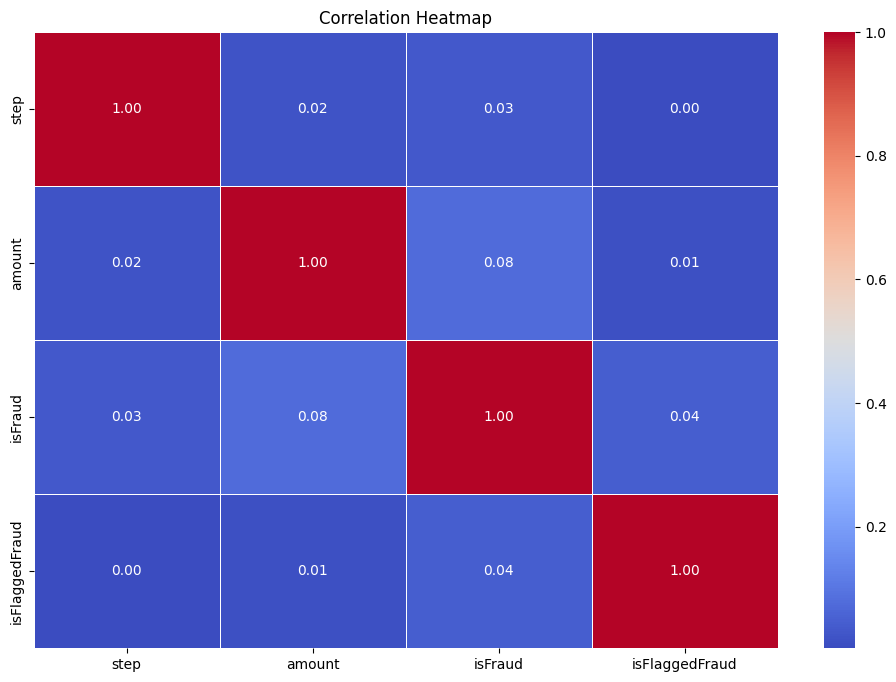

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

There is very low correlation throughout the heatmap, this is due to the low percentage of fraudulent transactions, to change this we will have to change the way we sample or generate synthetic data, We will do this later but lets have a look at how the Type of transaction influences Fraud Chance:

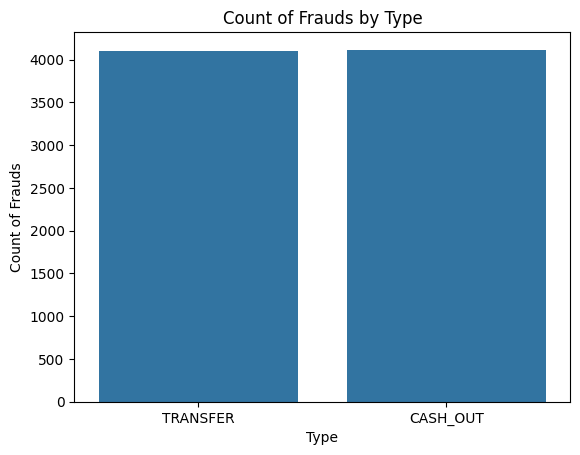

In [13]:
sns.countplot(x='type', data=df[df['isFraud'] == True])

plt.title('Count of Frauds by Type')
plt.xlabel('Type')
plt.ylabel('Count of Frauds')

plt.show()

We can see here that Fraud only happens with two types of transactions, TRANSFER and CASH_OUT, so Compliance teams only need to be looking at these two outcomes for fraudulent transactions

In [14]:
#sns.pairplot(df, hue='isFraud', diag_kind='kde')
#plt.show()

We can now look at some boxplots to see how amount potentially impacts Frauds

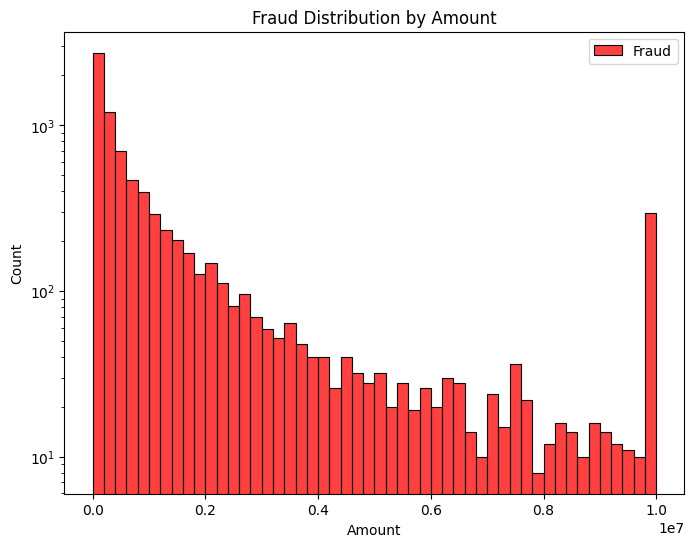

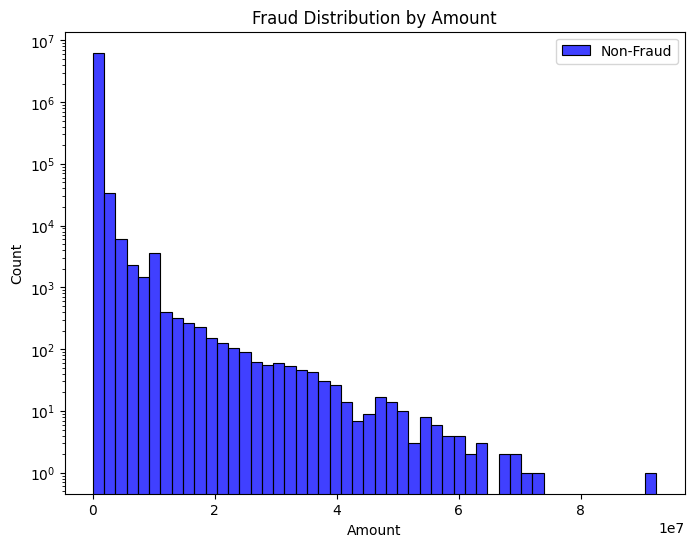

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(df[df['isFraud'] == 1]['amount'], bins=50, color='red', kde=False, log=True, label='Fraud')

plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Fraud Distribution by Amount')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
ax = sns.histplot(df[df['isFraud'] == 0]['amount'], bins=50, color='blue', kde=False, log=True, label='Non-Fraud')

plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Fraud Distribution by Amount')
plt.legend()
plt.show()

It seems that Fraudulent transactions are much more likely to be very large suggesting that maybe they are more likely to attempt to drain the whole bank account, this could be investigated if there was a working Original Balance column (I attempted to generate a percentage spent column but this through back errors due to there being Original Balances of 0).

Further analysis will be done in Tableau

# Modelling

- I am now going to start to model the data, first though we need to get our data ready for modelling, this will require a number of things. First I am going to need to convert the catergorical variable of type into a numerical one as well as the is_merchant column. I am going to do this using one-hot encoding, creating a new column with 1 if true for the category, while this will increase my data size it will allow me to model more easily

- Next i will use undersampling. Since the data is so large with so few fraudulent transactions it will be hard to teach the model anything. This will also help as often, in the case of fraud, we are more worred about false negatives (a fraudulent transaction being let through) than false positives (accidently investigating a normal transaction). Over sampling should help to reduce the number of flase negatives

## Data Preparation

First I will create the new columns containing the categorical variable Type

In [16]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns = ['type'])

df.head()

,step,amount,isFraud,isFlaggedFraud,is_merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
index,,,,,,,,,,
0,1,9839.64,0,0,True,False,False,False,True,False
1,1,1864.28,0,0,True,False,False,False,True,False
2,1,181.00,1,0,False,False,False,False,False,True
3,1,181.00,1,0,False,False,True,False,False,False
4,1,11668.14,0,0,True,False,False,False,True,False


Now I will split the data into Train and test data

In [17]:
from sklearn.model_selection import train_test_split

x= df.drop(['isFraud'], axis=1)
y= df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 123)

Now I will oversample this data, this is to avoid over-classification in the majority class, our model could always predict non-fraud and would be right 99.87% of the time, this would not help us detect fraud at all. I have chose undersampling over oversampling for a number of reasons:

- Undersampling will reduce the total amount of data we have, therefore reducing the time the run time of the model, this would not be a problem with enough CPU and time but for this brief it will help
- Undersampling avoids the need for me to generate data, while generating data is fine, this is already a synthetic data set and thus continuing to generate synthetic data may lead to data that barely represents the original
- I understand that it may lead to the loss of important information in the majortity class but overall, with the short time period to produce this and lack of deep understanding of how the data was generated this is the techinique I have decided to go for
- We also may end up overfitting to the minority class, this means we may have too many false positives, but these are better than false negatives


In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority', random_state=456)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)

# Display the counts
for class_label, count in zip(unique_classes, class_counts):
    print(f'Class {class_label}: {count} instances')

Class 0: 6580 instances
Class 1: 6580 instances


We have underfit the dataset so there are the same number of fraudulent transactions as non-fraudulent, this will help build a model that doesn't just pick not-fraud for every transactions

## Random Forest Classifier Model

For my first model I will use a Random Forest Classifier, there are a number of reasons:
- it is less prone to overfitting compared to individual trees
- It deals with outliers well
- Can be applied to numerical and categorical data
- We can provide insight into feature importance which will be vital for the compliance team

Random forest is not so impacted to scaling the data and therefore we shall not need to scale the data, below is some code incase we need to later

In [19]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

First model build

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123)

rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=123)

Make predictions on the Test set

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1123578  147313]
 [    186    1447]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270891
           1       0.01      0.89      0.02      1633

    accuracy                           0.88   1272524
   macro avg       0.50      0.89      0.48   1272524
weighted avg       1.00      0.88      0.94   1272524



## Understanding the outputs

### Confusion Matrix:

- Top left represents number of correctly identified negative outcomes (true negatives)
- Top Right indicates the number of incorrectly identified (false positives)
- Bottom left represents the number of fraudulent transactions misidentified as normal transactions
- Bottom Right indicicates the number of correctly indicidated Fradualuent transactions

### Classification Report

- Precision represents the number of correctly predicted positive values compared to incorrectly predicted positive, the 0.01 score is very low indiciating we had a number of false positives, we expect a lot of false positives due to the undersampling
- Recall shows the number of correctly predicted positive values compared to all positive values, this is high at 0.89 showing that the model is classifying most fraudulent transactions
- f1-score shows a balance of precision and recall, showing a balance of being able to correctly predict, this is very low showing how much the model is struggling to predict
- accuracy shows the proportion of correctly classified outcomes (88%)
- weighted average shows the overall average prediciton of the model

## Evaluation

- The model is correctly predicting most true cases of fraud but is still missing some
- The model is overpredicting the number of frauds massively, this would put added pressure on the Compliance team to investigate a huge number of transactions and would be expensive

## Conclusion

- The model would provide fairly good safety net for fraud but would be costly to run and would also miss a number of transactions
- To improve this model we could first try to change the parameters of the model or the undersampling, oversampling or creating synthetic data could potentially increase accuracy
- The main improvement would be to improve the data, firstly there are very few number of fraudulent transcations which make it extremely difficult to properly teach a model. Secondly there are very few columns once we have removed those which are unusable
- Lets visualise how the model is making decisions so that we can further understand it and compliance can use this information to see how decisions are made


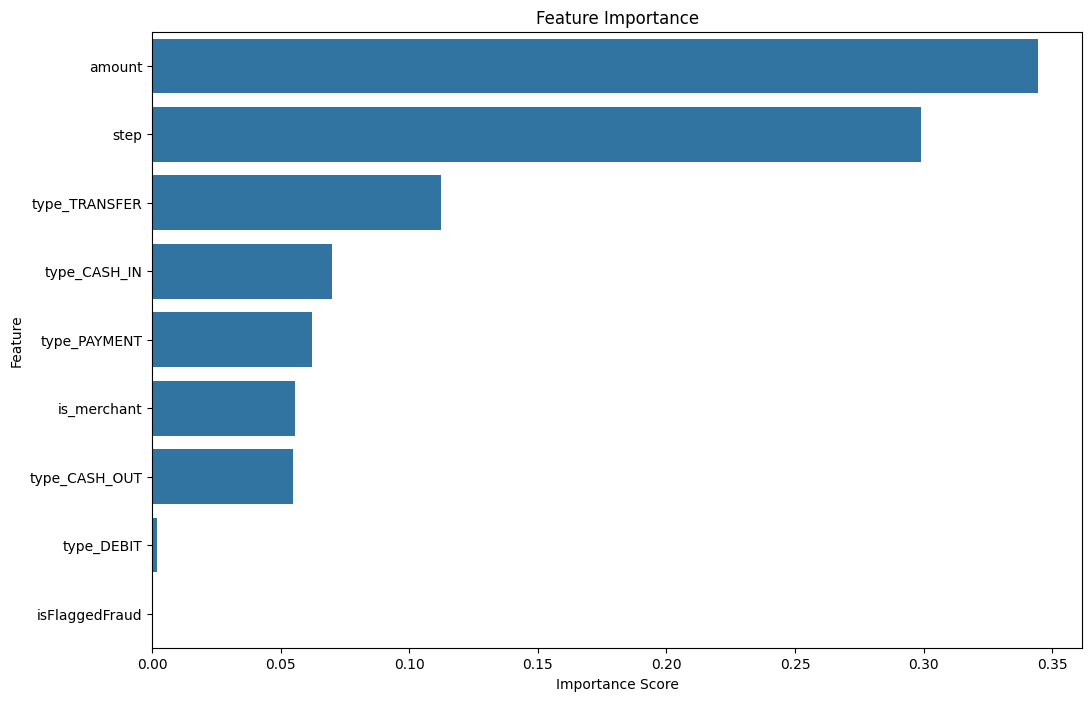

In [23]:
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train_resampled.columns

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

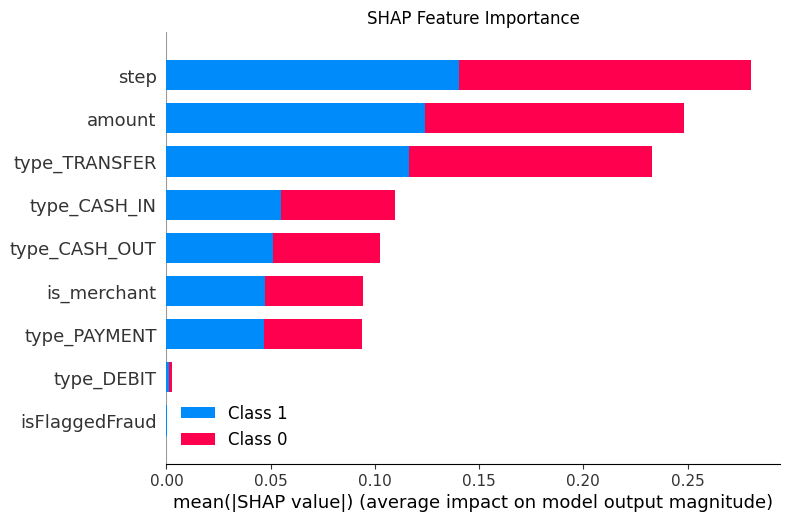

In [29]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_resampled)

# Summary plot
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.show()


## Model Performance 
- The model performed relatively poorly
- As expected it massively over-estimated the number of fraudulent transactions (false positives)
- It still missed some Fraudulent transaction (false negatives)
- It only had an f1-score of 0.48 showing that it struggles to predict correctly (shows ratio of true positives against false negatives and false positives) 
- Improvements could be made by:
- Changing the model to something like XGboost, a gradient boosting machine learning model
- Changing the sampling technique, such as creating synthetic data
- Improving the model parameters, by changing, and producing more models we could gain a more accurate model, but we have to be careful about overfitting our dataset